In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics import tsaplots

: 

In [3]:
df = pd.read_csv("./data/open_meteo_tokyo.csv")
df.head()

,time,temperature_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum
0,1940-01-02,0.5,-0.1,-4.9,0.0
1,1940-01-03,3.1,5.9,-4.8,0.0
2,1940-01-04,5.0,5.4,-1.9,0.0
3,1940-01-05,5.8,10.5,-3.9,0.0
4,1940-01-06,4.3,8.2,-2.3,0.1


In [8]:
df.isna().sum()

time                        0
temperature_mean            0
apparent_temperature_max    0
apparent_temperature_min    0
precipitation_sum           0
dtype: int64

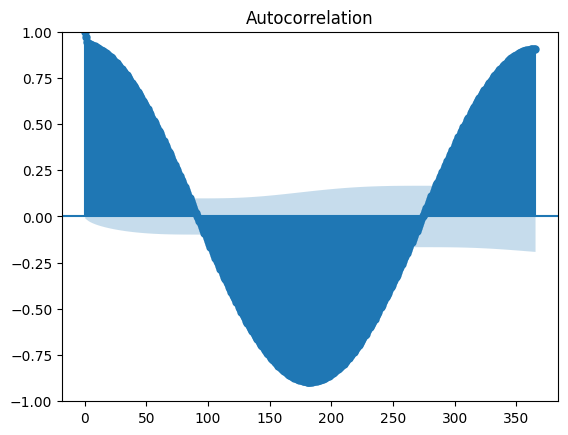

In [13]:
fig = tsaplots.plot_acf(df['temperature_mean'], lags=365)
plt.show()

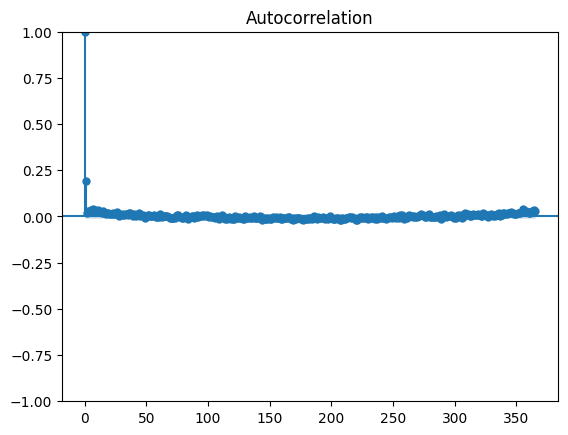

In [16]:
fig = tsaplots.plot_acf(df['precipitation_sum'], lags=1000)
plt.show()

In [21]:
values = pd.DataFrame(df['temperature_mean'].values)
 
dataframe = pd.concat([values.shift(i) for i in range(365, 0, -1)], axis=1)

dataframe.columns = ['t+' + str(i) for i in range(365)]
result = dataframe.corr()
 
print(result)

            t+0       t+1       t+2       t+3       t+4       t+5       t+6  \
t+0    1.000000  0.971577  0.946577  0.936231  0.931544  0.928214  0.925664   
t+1    0.971577  1.000000  0.971576  0.946576  0.936230  0.931541  0.928210   
t+2    0.946577  0.971576  1.000000  0.971576  0.946576  0.936230  0.931541   
t+3    0.936231  0.946576  0.971576  1.000000  0.971576  0.946576  0.936230   
t+4    0.931544  0.936230  0.946576  0.971576  1.000000  0.971576  0.946576   
...         ...       ...       ...       ...       ...       ...       ...   
t+360  0.914134  0.912673  0.911151  0.909545  0.907554  0.904447  0.901002   
t+361  0.915456  0.914136  0.912670  0.911148  0.909543  0.907548  0.904440   
t+362  0.916630  0.915458  0.914133  0.912667  0.911146  0.909537  0.907541   
t+363  0.918247  0.916632  0.915457  0.914132  0.912666  0.911143  0.909533   
t+364  0.919411  0.918249  0.916632  0.915457  0.914132  0.912664  0.911139   

            t+7       t+8       t+9  ...     t+355 

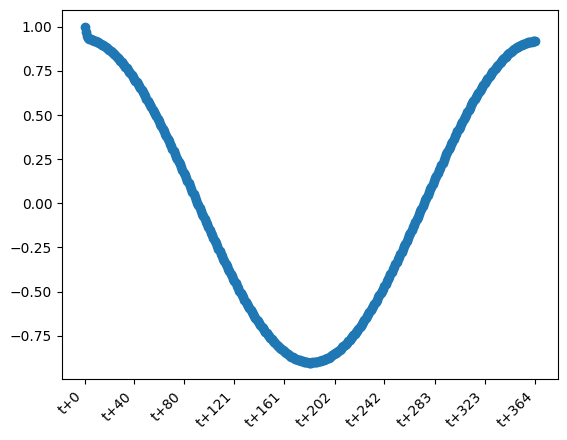

In [30]:
num_ticks = 10
tick_indices = np.linspace(0, len(result.columns) - 1, num_ticks, dtype=int)

plt.figure()

plt.scatter(result.columns, result['t+0'])

plt.xticks(ticks=tick_indices, labels=result.columns[tick_indices], rotation=45, ha='right')
plt.show()

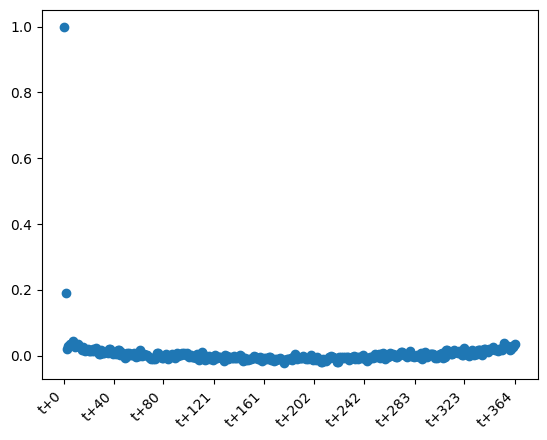

In [4]:

values = pd.DataFrame(df['precipitation_sum'].values)
 
dataframe = pd.concat([values.shift(i) for i in range(365, 0, -1)], axis=1)

dataframe.columns = ['t+' + str(i) for i in range(365)]
result = dataframe.corr()
 
num_ticks = 10
tick_indices = np.linspace(0, len(result.columns) - 1, num_ticks, dtype=int)

plt.figure()

plt.scatter(result.columns, result['t+0'])

plt.xticks(ticks=tick_indices, labels=result.columns[tick_indices], rotation=45, ha='right')
plt.show()

In [11]:
a = result['t+0'].iloc[1]
print(a+1)

1.1907396511140695
